In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style
style.use("ggplot")
# from matplotlib import rcParams
# rcParams['figure.figsize'] = 10, 8

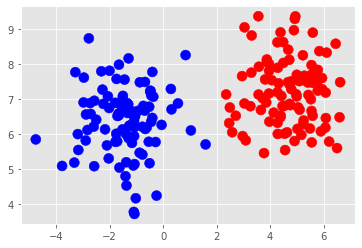

In [11]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, centers=2, random_state=27, cluster_std=0.98)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr");
plt.show()

In [12]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
# Create the SVC Model
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model

SVC(kernel='linear')

In [14]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [ 1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [15]:
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .................C=1, gamma=0.0001;, score=1.000 total time=   0.0s
[CV 2/5] END .................C=1, gamma=0.0001;, score=0.967 total time=   0.0s
[CV 3/5] END .................C=1, gamma=0.0001;, score=1.000 total time=   0.0s
[CV 4/5] END .................C=1, gamma=0.0001;, score=1.000 total time=   0.0s
[CV 5/5] END .................C=1, gamma=0.0001;, score=0.967 total time=   0.0s
[CV 1/5] END .................C=1, gamma=0.0005;, score=1.000 total time=   0.0s
[CV 2/5] END .................C=1, gamma=0.0005;, score=0.967 total time=   0.0s
[CV 3/5] END .................C=1, gamma=0.0005;, score=1.000 total time=   0.0s
[CV 4/5] END .................C=1, gamma=0.0005;, score=1.000 total time=   0.0s
[CV 5/5] END .................C=1, gamma=0.0005;, score=0.967 total time=   0.0s
[CV 1/5] END ..................C=1, gamma=0.001;, score=1.000 total time=   0.0s
[CV 2/5] END ..................C=1, gamma=0.001;

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=3)

In [16]:
# List the best parameters for this dataset
print(grid.best_params_)

{'C': 5, 'gamma': 0.0001}


In [17]:
# List the best score
print(grid.best_score_)
# print(grid.cv_results_)
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
   print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

0.9933333333333334
0.987 (+/-0.033) for {'C': 1, 'gamma': 0.0001}
0.987 (+/-0.033) for {'C': 1, 'gamma': 0.0005}
0.987 (+/-0.033) for {'C': 1, 'gamma': 0.001}
0.987 (+/-0.033) for {'C': 1, 'gamma': 0.005}
0.993 (+/-0.027) for {'C': 5, 'gamma': 0.0001}
0.993 (+/-0.027) for {'C': 5, 'gamma': 0.0005}
0.993 (+/-0.027) for {'C': 5, 'gamma': 0.001}
0.993 (+/-0.027) for {'C': 5, 'gamma': 0.005}
0.993 (+/-0.027) for {'C': 10, 'gamma': 0.0001}
0.993 (+/-0.027) for {'C': 10, 'gamma': 0.0005}
0.993 (+/-0.027) for {'C': 10, 'gamma': 0.001}
0.993 (+/-0.027) for {'C': 10, 'gamma': 0.005}
0.993 (+/-0.027) for {'C': 50, 'gamma': 0.0001}
0.993 (+/-0.027) for {'C': 50, 'gamma': 0.0005}
0.993 (+/-0.027) for {'C': 50, 'gamma': 0.001}
0.993 (+/-0.027) for {'C': 50, 'gamma': 0.005}



In [18]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test)

In [19]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red"]))

              precision    recall  f1-score   support

        blue       1.00      1.00      1.00        27
         red       1.00      1.00      1.00        23

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



Source: [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)